In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "bike_sales_india.csv"
df = pd.read_csv(file_path)

df.columns
df.isnull().sum()

State                      0
Avg Daily Distance (km)    0
Brand                      0
Model                      0
Price (INR)                0
Year of Manufacture        0
Engine Capacity (cc)       0
Fuel Type                  0
Mileage (km/l)             0
Owner Type                 0
Registration Year          0
Insurance Status           0
Seller Type                0
Resale Price (INR)         0
City Tier                  0
dtype: int64

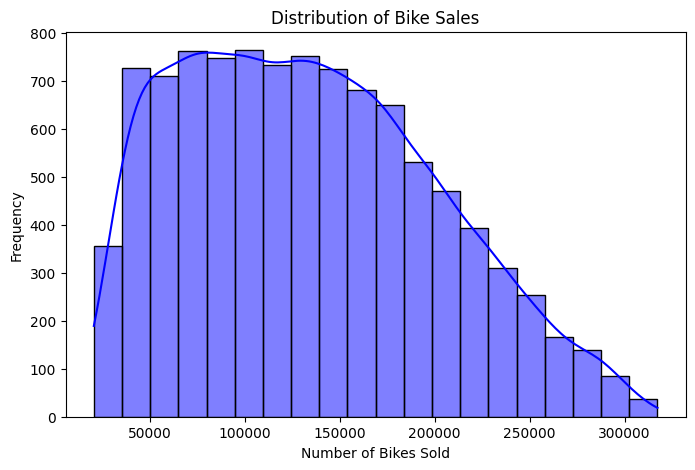

In [13]:
# Histogram of Bike Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Resale Price (INR)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Bike Sales')
plt.xlabel('Number of Bikes Sold')
plt.ylabel('Frequency')
plt.show()

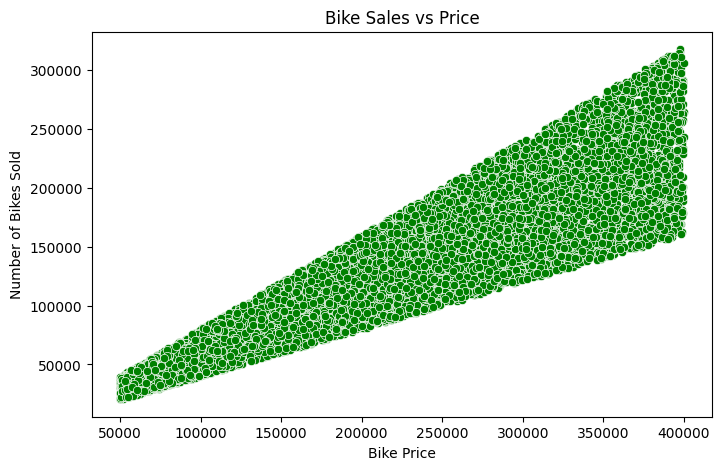

In [14]:
# Scatter plot of Sales vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Price (INR)'], y=df['Resale Price (INR)'], color='green')
plt.title('Bike Sales vs Price')
plt.xlabel('Bike Price')
plt.ylabel('Number of Bikes Sold')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19792\4038437568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Brand'], y=df['Resale Price (INR)'], palette='coolwarm')


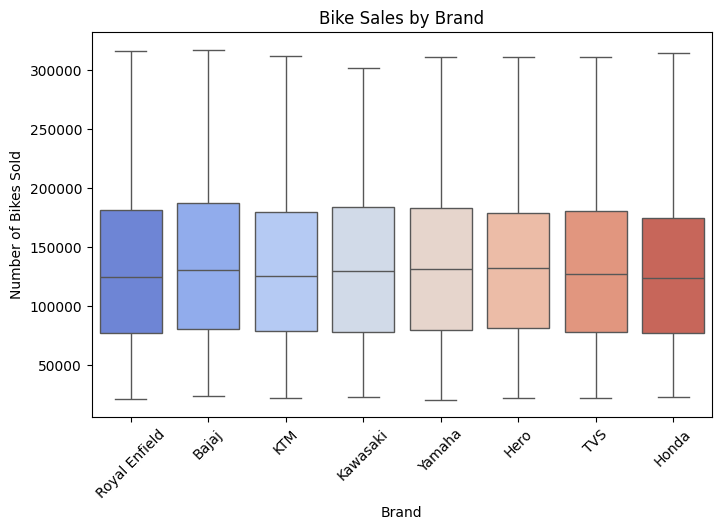

In [15]:
# Boxplot of Sales by Brand
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Brand'], y=df['Resale Price (INR)'], palette='coolwarm')
plt.title('Bike Sales by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Bikes Sold')
plt.xticks(rotation=45)
plt.show()

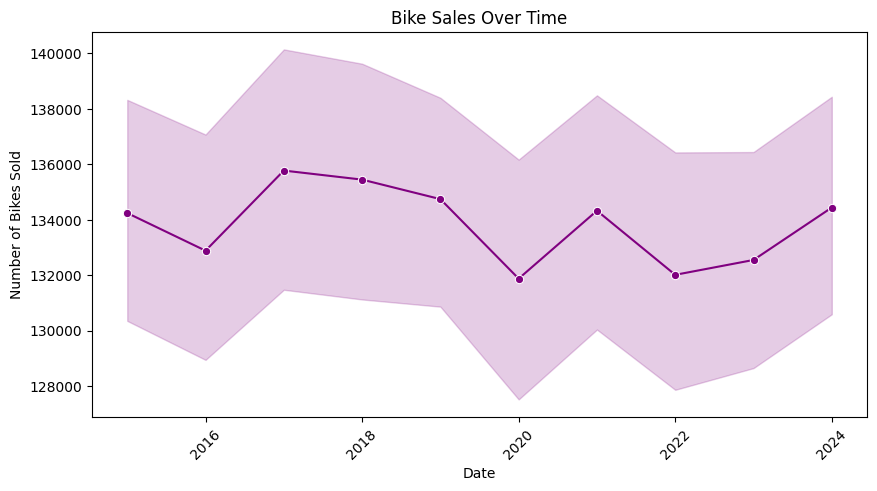

In [16]:
# Line plot of Sales over Time
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Year of Manufacture'], y=df['Resale Price (INR)'], marker='o', color='purple')
plt.title('Bike Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bikes Sold')
plt.xticks(rotation=45)
plt.show()

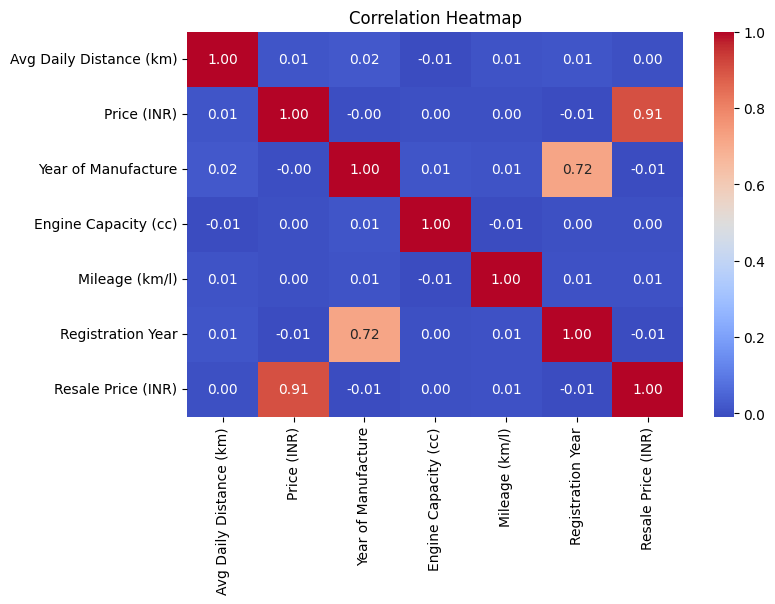

In [17]:
# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Selecting features and target variable
X = df[['Price (INR)', 'Engine Capacity (cc)', 'Mileage (km/l)', 'Year of Manufacture']]
y = df['Resale Price (INR)']

In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Applying Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Making predictions
y_pred = model.predict(X_test)

In [22]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Model Evaluation:
Mean Absolute Error: 22658.39880001821
Mean Squared Error: 834274732.5272723
R-squared Score: 0.8100566858794348


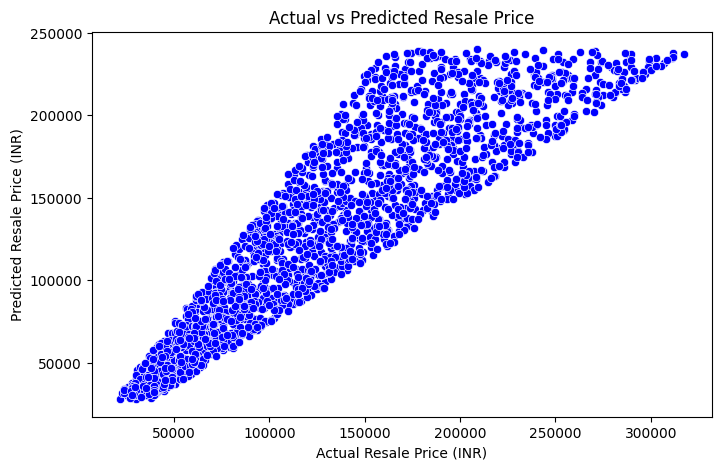

In [23]:
# Scatter plot of Actual vs Predicted Resale Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual Resale Price (INR)')
plt.ylabel('Predicted Resale Price (INR)')
plt.title('Actual vs Predicted Resale Price')
plt.show()